Introduction
=============
This is a simple toy model intended for qualitative studies of virus spread. Similar results have been shared many times, but I wanted to describe the dynamics using my own terminology and using data that are available to the public. The model is intentionally somewhat explicit to make it more instructive.

After writing this piece I have found the [SIR and related models](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology), which in their essence do not seem very different from what I have developed below.


Background
=============

In the following I will develop a model for the mean behavior of the population that does not resolve the interactions between single individuals. Thus, effects and parameters introduced represent averages over the entire population.


Single stage infection model
----------

### The model
Assume that an individual can have one of four states namely healthy $\mathrm{H}$, infected $\mathrm{I}$, recovered $\mathrm{R}$ or dead $\mathrm{D}$.  The order from which an individual goes from being healthy to having recovered or died may be written

$$ \mathrm{H} \rightarrow \mathrm{I} \rightarrow \mathrm{D}\:\rm{or}\:\mathrm{R}.$$

I have later found out that the healthy individuals most often are referred to as the "susceptible", but for now I will stick to my own notation. Recovered individuals are healthy as such, but cannot be infected again. Further, I only consider deaths due to the infection. The number of individuals corresponding to the four states are $N_{\rm{H}}$, $N_{\rm{I}}$, $N_{\rm{R}}$, and $N_{\rm{D}}$. The total population count $N$ is given by $N_{\rm{H}} + N_{\rm{I}} + N_{\rm{R}} + N_{\rm{D}}$. The healthy population fraction $H$ is $N_{\rm{H}}/N$, the infected population fraction $I$ is $N_{\rm{I}}/N$, the recovered population fraction $R$ is $N_{\rm{R}}/N$ and the dead population fraction $D$ is $N_{\rm{D}}/N$.

The rate of change in the healthy population $\dot{H}$ can be written

$$\dot{H} = -\dot{I}_{+} = - E p_{\rm{t}} I H = -r_{\rm{I+}} I H, $$

where the dot symbolizes a time derivative. $\dot{I}_{+}$ is the contribution per unit time to the infected population from  healthy individuals becoming infected. The product $I H$ is the probability of an infected individual coming into contact with a healthy individual. $E$ is the number of contacts between any two people per unit time and $p_{\rm{t}}$ is the probability of any encounter yielding conditions that are favorable for transmission of the infection. See the Appendix for a more thorough justification.

In this single stage model an infected individual goes directly from the infected state to either recovery or death. If there is a fixed  probability of an infected individual recovering or dying in any time interval and when the recovery/death of one individual is uncorrelated to the recovery/death of another infected individual the "decay" from the state of being infected can be described as a Poisson process with the fixed positive rate $r_{\rm{I-}}$ (see e.g. [this description](https://www.phys.ufl.edu/courses/phy4803L/group_I/gamma_gamma/poisson.pdf)). The infection times will follow an exponential distribution with a mean residence time of $1/r_{\rm{I-}}$. Later, in the section on multistage infections, we will look further into the influence of this fixed rate assumption, but for now the rate at which the infected population diminishes may expressed in terms of the mean rate $r_{\rm{I-}}$

$$ \dot{I}_{-} = -r_{\rm{I-}} I .$$

The subscript on $I_{-}$ indicates that only contributions from processes reducing $I$ are included. Somewhat arbitrarily, I  define the infection time $\tau$ as the time where 80 % of the infected individuals have recovered or died. The infection time can be defined at any other percentage or from the mean infection time if that is more convenient. In our case the rate can be calculated as $r_{\rm{I-}} = -\log_{\rm{e}}(1 - 0.8) / \tau $. From $\dot{I}_{-}$ the rate of change in the recovered population can be defined as


$$\dot{R} = -p_{\rm{r}} \dot{I}_{-} = p_{\rm{r}} r_{\rm{I-}} I, $$


where $p_{\rm{r}}$ is the proportion of infected individuals that recover. Similarly, the rate of change in the dead population can be written

$$ \dot{D} = -p_{\rm{d}} \dot{I}_{-} = p_{\rm{d}} r_{\rm{I-}} I,$$

where $p_{\rm{d}}$ is the proportion of infected individuals that die. Since there are only two possible outcomes from an infection namely recovery or death we have $p_{\rm{r}} + p_{\rm{d}} = 1$. With these definitions, recovery and death happens at the same timescale. The total population count is preserved (including deads) and therefore the rate of change in the infected individuals can be written

$$ \dot{I} = \dot{I}_{+} + \dot{I}_{-} = -\dot{H} - \dot{R} - \dot{D} .$$

By solving these coupled ordinary differential equations the infection dynamics can be simulated. 

### Properties

Before we go ahead it is useful to investigate which parameter combination would result in a constant number of infections i.e. $\dot{I} = 0$. For this to be fulfilled the positive and negative contributions must balance which yields

$$-\dot{I}_{+} = \dot{I}_{-} \Leftrightarrow -r_{\rm{I+}} I H = -r_{\rm{I-}} I.$$

Rearranging a bit we find

$$ \frac{r_{\rm{I+}}}{r_{\rm{I-}}} =  \frac{1}{H}.$$

At early times when the infection is not very wide spread $H \approx 1$ and then condition becomes

$$ \frac{r_{\rm{I+}}}{r_{\rm{I-}}} = 1.$$

Thus, if $r_{\rm{I+}} / r_{\rm{I-}} < 1$ the number of infected individuals decreases from day 0.

If, initially, $\dot{I} > 0$ $I$ will have a maximum for $t>0$. To aid the discussion I, heuristically, define the start of the outbreak as the time where $I$ has reached 5 % of its maximum value. Similarly, the end of the outbreak is defined as the time where $I$ has dropped to 5 % of its maximum value. The time between the start and end is the duration.


### Additional states

In addition to the states introduced above the infected individuals that require hospitalization $I_{\rm{h}} = p_{\rm{h}} I$ as well as infected individuals that require mechanical ventilation $I_{\rm{v}} = p_{\rm{v}} I_{\rm{h}}$ are calculated. 
$p_{\rm{h}}$ is the fraction of infected individuals that require hospitalization and $p_{\rm{v}}$ is the fraction of infected and hospitalized individuals that require mechanical ventilation. The proportion of infected individuals that die if they require mechanical ventilation, but a ventilator is not available is $p_{\rm{d,nv}}$. If a ventilator is available this proportion is $p_{\rm{d}}$ as for the remaining infected population. The number of ventilators is $N_{\rm{v}}$ and the number of missing ventilators (no ventilator available) is $N_{\rm{nv}}$ is 

$$ N_{\rm{nv}} = \max(I_{\rm{v}} N - N_{\rm{v}}, 0).$$

The contribution to the total death rate from individuals missing a ventilator $\dot{D}_{\rm{nv}}$ is 

$$ \dot{D}_{\rm{nv}} = p_{\rm{d,nv}} r_{\rm{I-}} \frac{N_{\rm{nv}}}{N} = p_{\rm{d,nv}} r_{\rm{I-}} I_{\rm{nv}}, $$

where $I_{\rm{nv}}$ is the infected population fraction in need mechanical ventilation, but where no ventilator is available. Some of the rate equations presented above must be slightly modified to preserve the number of individuals. The rate of change in the dead population coming from infected individuals that do not require ventilation becomes

$$ \dot{D} = p_{\rm{d}} r_{\rm{I-}} (I -  I_{\rm{nv}}).$$

Since an infected individual can only die or recover the rate of change in $R$ becomes

$$\dot{R} =  r_{\rm{I-}}I - \dot{D} - \dot{D}_{\rm{nv}}. $$


Multistage infections & delays
-------
### The model
<a id='multistage_model'></a>
The exponentially distributed residence times for the infected state used above, rests on the assumption that the probability per unit time of exiting infection is constant. Consequently, the rate of change in the infected population only depends on the current state and not the "age" of the infection. This is mathematically convenient, but may not represent reality. To relax this assumption let us assume that the infection can be divided into $k$ sequential stages and that the order from which an individual goes from being healthy to having recovered or died may be written

$$ \mathrm{H} \rightarrow \mathrm{I}_1 \rightarrow \mathrm{I}_2 \rightarrow ... \rightarrow \mathrm{I}_k \rightarrow \mathrm{D} \:\rm{or}\: \mathrm{R}.$$

$I_i (i \in 1...k)$ represents the $i$'*th* stage of the infection that may or may not represent a physiological state. An individual can only exit the infection from the $k$'*th* infection stage. Assuming an exponential distribution for the residence times in the $i$'*th* infection stage with a mean rate $r_i$ we may express the rate of change for the first infection stage as


$$ \dot{I}_{1} = H \sum_{i=1}^{k} r_{\rm{I+}, i} I_i  - r_1 I_1 = r_{\rm{I+}} I H - r_1 I_1. $$

In the last step we have, for simplicity, assumed that $r_{\rm{I+},i}$ are all the same and equal to $r_{\rm{I+}}$ and have introduced $I = \sum_{i=1}^k I_i$. This simplification would at some point be worth relaxing since the first stage might be free of symptoms such as coughing and sneezing. A symptom-free infection stage 1 would reduce $r_{\rm{I+}, 1}$ via $p_{\rm{t}}$ for that stage while, in later stages, symptoms could affect $r_{\rm{I+}, 1}$ via an increased $p_{\rm{t}}$, but reduced $E$. But for now all stages are assumed to have the same parameters. For the second infection stage we have

$$ \dot{I}_{2} = r_1 I_1 - r_2 I_2, $$

and similarly up until the $k$'*th* stage

$$ \dot{I}_{k} = r_{k-1} I_{k-1} - r_k I_k. $$

As before $r_i > 0$. 

### Additional states
To account for the effect of missing ventilators I now assume that an individual is equally likely to require ventilation in all stages and equally likely to be assigned a ventilator in all stages. Thus, in stage $k$, the number of missing ventilators $N_{\rm{nv}, k}$ is 

$$ N_{\rm{nv}, k} = \frac{ I_k }{ I } \max(I_{\rm{v}} N - N_{\rm{v}}, 0).$$

Since only the $k$'th stage can lead to death, missing a ventilator in the infection stages preceding the $k$'*th* is without any consequence and therefore the contribution to the total death rate from the population missing a ventilator $\dot{D}_{\rm{nv}}$ is 

$$ \dot{D}_{\rm{nv}} = p_{\rm{d,nv}} r_k \frac{N_{\rm{nv},k}}{N} = p_{\rm{d,nv}} r_k I_{\rm{nv},k}. $$

### The Erlang connection
If all $r_i$ are the same and equal to $r$ the overall infection time follow Erlang($t; r, k$) since Erlang($t; r, k$) is the waiting time for $k$ events in a Poisson process with rate $r$ (see e.g. [Wikipedia](https://en.wikipedia.org/wiki/Erlang_distribution)). Although I will not make use of the Erlang distribution in my virus simulations there are some properties of the Erlang distribution that are useful to recognize to better interpret the results from simulations with a multistage infection model. First note that, the exponential distribution is actually an Erlang distribution with $k$=1. Further, for a fixed rate both the mean and variance increase with increasing $k$. If, however, we fix the mean (infection time) to the value used in a single stage model ($k$=1 i.e. exponential) the rate parameter in the Erlang distribution $r_{Erl}$ is $k$ times the exponential rate parameter $r_{Exp}$ i.e.

$$ r_{Erl} = kr_{Exp}.$$

Therefore, the variance in the Erlang distribution is $k$ times smaller than the variance of the exponential distribution with the same mean:

$$ \sigma^2_{Erl} = \frac{k}{r_{Erl}^2} = \frac{k}{(kr_{Exp})^2} = \frac{\sigma^2_{Exp}}{k}.$$


Further, the symmetry increases (decreasing skewness) with increasing $k$. All in all, with increasing $k$, the waiting time distribution gets narrower and there will be an increasing probability mass above the mean approaching symmetry. These features can clearly be seen when the distributions are [plotted](https://en.wikipedia.org/wiki/Erlang_distribution).

Above we used the Erlang distribution to explain some properties of one special case of a multistage infection. The reverse approach i.e. the breakdown of the Erlang waiting time distribution into $k$ sequential exponential stages is commonly referred to as the "Linear Chain Trick" or "LCT". In the following we keep the explicit coupled ODE form to avoid dealing with delay differential equations. In keeping the explicit coupled ODE form we are not constrained to using the same rate in all infection stages - although we will.

Limitations
==========
Some of the limitations in the model are listed below:

* no collateral effects "outside" the infection are accounted for i.e. general scarcity of ambulances, health personnel, masks, psychological effects of interventions etc.,
* recovered individuals cannot be infected again (immunity),
* some couplings are neglected e.g. all infected individuals encounter $E$ individuals even if infected or hospitalized, and
* the parameters are not very accurate.

None of these simplifications will limit the learnings from this exercise. The parameter uncertainty is important and therefore, methods for handling such uncertainty will also be presented.


Results & discussion
==============
In the first five sub-sections I assume $k$=1 i.e. a single stage infection with exponentially distributed waiting times. In the final sub-section I address the effect of a multi-stage infection i.e. $k$>1.

Flu simulation
-------------------

<a id='flu_simulation'></a>


The flu parameters can be estimated from [CDC](https://www.cdc.gov/flu/about/burden/preliminary-in-season-estimates.htm). The factorization of $r_{\rm{I+}}$ is not important for the solution, but let us attempt to factorize it to get a better feel for the orders of magnitude involved. 

* Based on personal experience, I fix $E$ to 50. 
* Similarly, I set the infection time (here the time to 80 % recovery or death) for a flu to seven days. 
* By hand, I adjust the transmission probability $p_{\rm{t}}$, which is more difficult to assert, to fit the actual number of fatalities due to flu in the U.S.. The value ends up at 0.5026 %.

Then I run a flu simulation for Denmark assuming that the parameters obtained for the U.S. apply to Denmark. The results are shown below in the figure below where the arrows in the legend indicates which axis the data belongs to.

--------------------------------
Parameters
--------------------------------
Encounters               50 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0       500 
Infctn time (τ)           7 day
Infctn stages (k)         1 
Survival at τ        20.000 %
Mean infctn time      4.349 day
r_I+                  0.251 /day
r_I-                  0.230 /day
k·r_I+ / r_I-         1.093 
p_t                    0.50 %
p_h                    1.44 %
p_d                    0.10 %
p_v                    0.00 %
p_d,nv                 0.00 %
--------------------------------


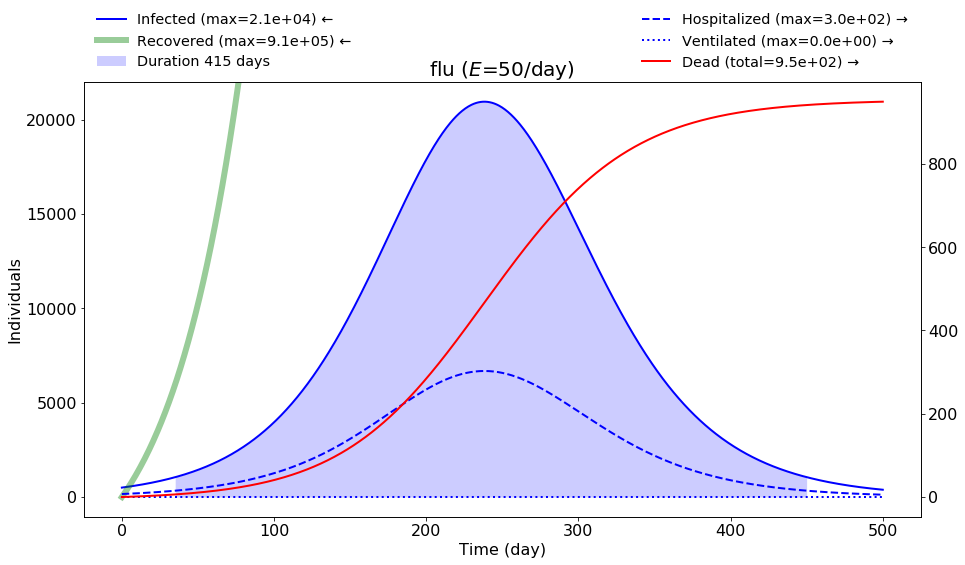

In [1]:
from src import run
encounters_per_day = 50
run.virus('flu', 'denmark',
          encounters_per_day, tspan=[0, 500])

Then curves show the mean behavior of the population and does not resolve the specific path for any single individual. 
We see that the flu season results in 10$^3$ deaths and lasts for about 420 days. At its maximum $21 \cdot 10^3$ people will be infected and $0.3 \cdot 10^3$ will be hospitalized. About 20 % of the population will be infected during the epidemic. The death count is quite close to the actual number of [fatalities due to flu in Denmark](https://www.ssi.dk/sygdomme-beredskab-og-forskning/sygdomsovervaagning/i/influenzasaesonen---opgoerelse-over-sygdomsforekomst-2018-19). In general parameters cannot be expected to be universal due to differences in e.g. population density which would most likely affect $E$ and due to cultural differences in e.g. how people greet (hand shake, bow, nod, hug, kiss) which would affect $p_{\rm{t}}$. The predicted duration of 415 days seems very high and we cannot validate the maximum infection count of $21 \cdot 10^3$. We will take a closer look at these two numbers in the section [Multistage infections](#multistage_infections).

COVID-19 simulation (no intervention scenario)
-------------
For the COVID-19 simulation with no intervention I use many of the parameter values estimated from flu data. These may provide a good starting point for discussion and may point to which COVID-19 parameters are most important to test. For example, at the time of writing $p_{\rm{h}}$ is difficult to estimate for COVID-19 since the number of infected individuals is unknown. Therefore I choose to use $p_{\rm{h}}$ from flu data with the knowledge that, with more data, $p_{\rm{h}}$ should be updated. Two parameters have, however, been adjusted 

* The infection time has been increased from seven days to 14 days, which is a frequently mentioned number for a reasonable quarantine period. 
* $p_{\rm{d}}$ is estimated to lie in the range 0.5 to 1 % (see e.g. [here](https://www.bbc.com/news/health-51674743) or [here](https://edition.cnn.com/2020/03/30/health/coronavirus-lower-death-rate/index.html) ). I will use 0.5 % which gives a lower bound for the number of fatalities. 

Note that I have not increased the transmission probability only the infection time, which will, in turn, increase the number of healthy individuals one infected individual will encounter. In the previous section  we successfully used $p_{\rm{t}}$ based on flu data from the U.S. to simulate flu in Denmark. Whether $p_{\rm{t}}$ can also be considered virus independent, as I have assumed here, is up to experts to verify. In any case, with my assumptions, the simulation results are shown below.

--------------------------------
Parameters
--------------------------------
Encounters               50 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0       500 
Infctn time (τ)          14 day
Infctn stages (k)         1 
Survival at τ        20.000 %
Mean infctn time      8.699 day
r_I+                  0.251 /day
r_I-                  0.115 /day
k·r_I+ / r_I-         2.186 
p_t                    0.50 %
p_h                    1.44 %
p_d                    0.50 %
p_v                   20.00 %
p_d,nv                90.00 %
--------------------------------


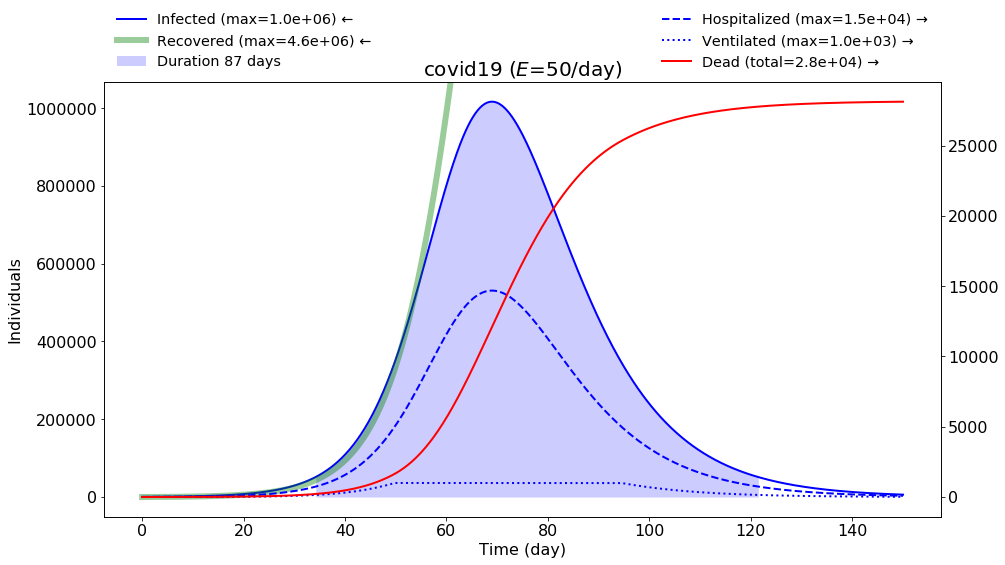

In [2]:
run.virus('covid19', 'denmark',
          encounters_per_day, tspan=[0,150])

With no intervention the COVID-19 epidemic is predicted to last about 87 days and result in $28\cdot10^3$ deaths. I have used $p_{\rm{v}}$ = 20 % and $p_{\rm{d,nv}}$ = 90 %. In other words [20 % of the hospitalized individuals require mechanical ventilation](https://jv.dk/artikel/fakta-sådan-udvikler-corona-indlæggelser-sig-2020-3-29) and 90 % of infected individual that require a mechanical ventilation will die if no ventilator is available. The value of $p_{\rm{d,nv}}$ is a number that I made up without any credible references. About 80 % of the population will be infected during the epidemic.
With no limit on the number of ventilators the death count would be $23\cdot 10^3$ (data not shown), which corresponds to 0.5 % of $R$ + $D$ and is therefore consistent with $p_{\rm{d}}$. The excess death count due to lack of ventilators ($5\cdot 10^3$) is of course strongly dependent on $p_{\rm{d,nv}}$, which is quite uncertain given that it is simply set to 90 % without any references or medical insight. Further, the maximum in the infection count in the flu simulation was not validated against data and consequently maximum infection count in the COVID-19 case may not represent the reality. Since the maximum infection count  essentially governs the excess death count due to lack of ventilators it is important to keep this uncertainty in mind. We will take a closer look at maximum infection count in the section [Multistage infections](#Multistage_infections).

COVID-19 simulation (flattened scenario)
-------------------
In this section, the encounters per day is reduced from 50 to 30 to simulate some degree of social distancing. This makes the ratio $r_{\rm{I+}} / r_{\rm{I-}}$ drop from 2.19 (no intervention) to 1.31. The results are shown below.

--------------------------------
Parameters
--------------------------------
Encounters               30 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0       500 
Infctn time (τ)          14 day
Infctn stages (k)         1 
Survival at τ        20.000 %
Mean infctn time      8.699 day
r_I+                  0.151 /day
r_I-                  0.115 /day
k·r_I+ / r_I-         1.312 
p_t                    0.50 %
p_h                    1.44 %
p_d                    0.50 %
p_v                   20.00 %
p_d,nv                90.00 %
--------------------------------


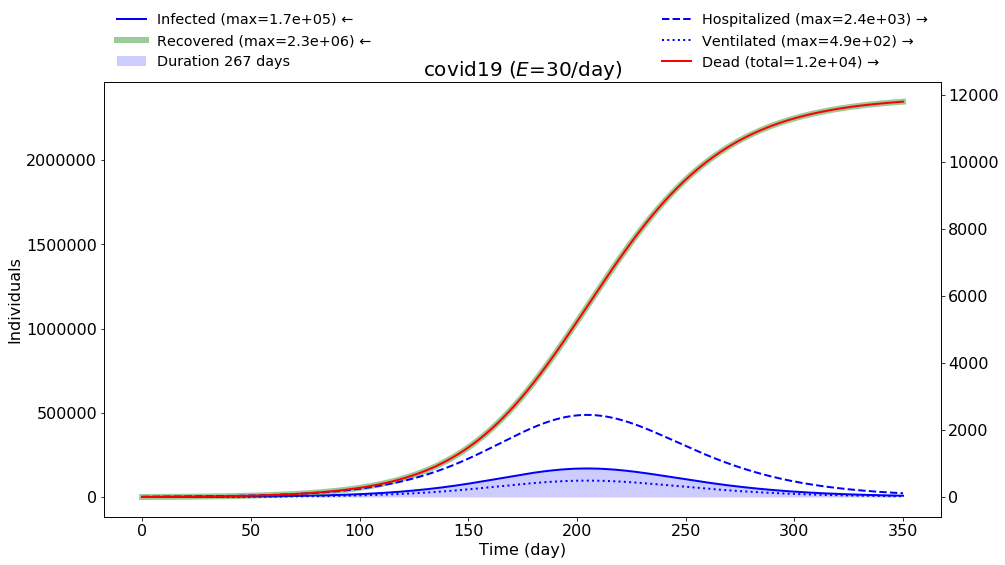

In [3]:
encounters_per_day = 30
run.virus('covid19', 'denmark',
          encounters_per_day,
          show_recovered=True,
          tspan=[0, 350])

The figure shows that mild social distancing reduces the peak as well as the total number of infected individuals and the delays the infection peak compared the no intervention scenario. Further, the number of deads is also significantly reduced. This is the so-called "flattened curve". Note that the upper limits of both the x-axis and the y-axis are different compared to the previous figure.

COVID-19 simulation (damped scenario)
-----------------------
Increasing social distancing even further by reducing the encounters per day to 15 makes $r_{\rm{I+}} / r_{\rm{I-}}$ drop from 2.19 (no intervention) to 0.66. The results from such a simulation is shown below.

--------------------------------
Parameters
--------------------------------
Encounters               15 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0       500 
Infctn time (τ)          14 day
Infctn stages (k)         1 
Survival at τ        20.000 %
Mean infctn time      8.699 day
r_I+                  0.075 /day
r_I-                  0.115 /day
k·r_I+ / r_I-         0.656 
p_t                    0.50 %
p_h                    1.44 %
p_d                    0.50 %
p_v                   20.00 %
p_d,nv                90.00 %
--------------------------------


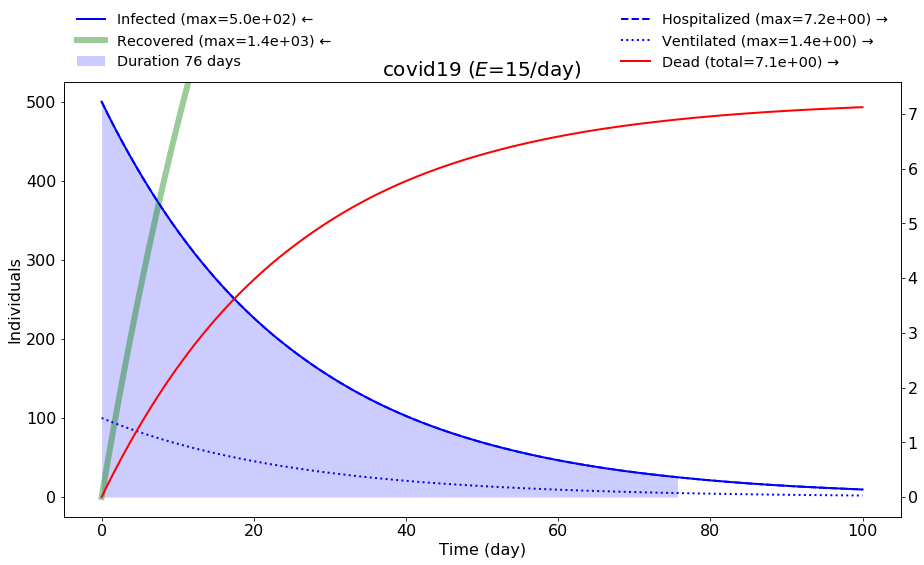

In [4]:
encounters_per_day = 15
run.virus('covid19', 'denmark',
          encounters_per_day,
          tspan=[0, 100])

Since $r_{\rm{I+}} / r_{\rm{I-}}$ is less than unity the infection count steadily drops toward zero.

COVID-19 simulation (closing-reopening scenario)
-----------
<a id='nominal_close_reopen'></a>
In the scenarios shown in the previous sections the model parameters were fixed in time. Now I will vary $E$ in three steps representing a closing-reopening strategy. I will start using $E$ = 50 until day 40 where social distancing is enforced by reducing $E$ to 15. This strict distancing regime is maintained for 14 days after which, at day 54, society is somewhat opened up as represented by increasing $E$ to 30. The results are shown below.

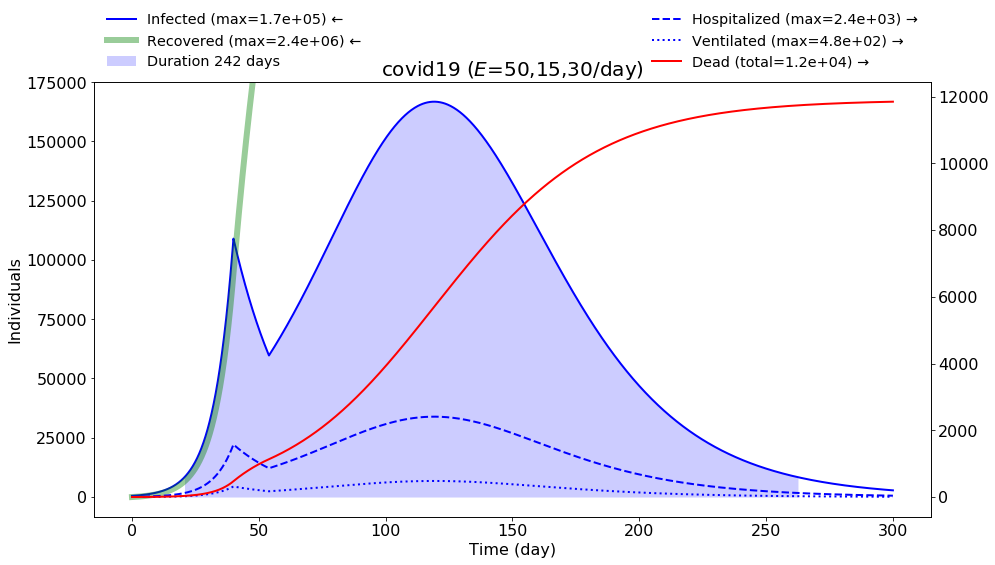

In [5]:
run.virus('covid19', 'denmark', [50, 15, 30], tspan=[0, 40, 54, 300])

We see that the outbreak quickly picks up speed after reopening and ends up with the same number of dead individuals is in the *flattened scenario*. The maximum number of ventilators required is ~480 which is below the number of ventilator (1000) and slightly below ~490 which is the required number of ventilator found in the *flattened scenario* 

Parameter uncertainty
-----------------------------
Since many of the model parameters are quite uncertain it is instructive to look variations in the solution with respect to some of these parameters. First I will illustrate a parameter gridding method, which is nice for getting a qualitative overview and then I will show a more quantitative approach.

### Parameter grid
Here I  simply vary two parameters namely $p_{\rm{d}}$ and $\tau$ on a regular grid and calculate the number of deads in each grid point. All other parameters are the same as in the no intervention scenario. The result is shown below.

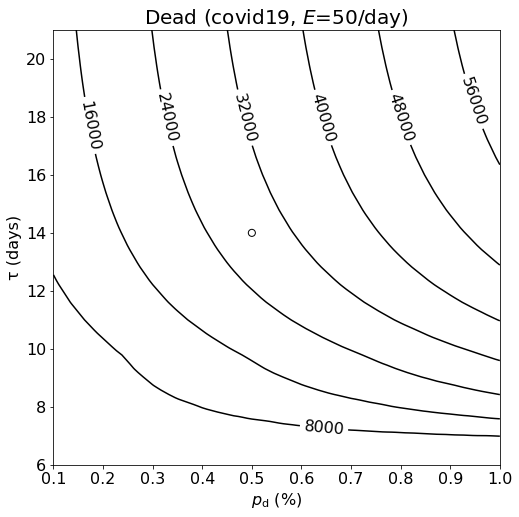

In [6]:
par1 = dict(axlabel=r'$p_{\rm{d}}$ (%)',
            name='p_d',
            min=0.001,
            max=0.01,
            transform=run.frc_to_pct
            )

par2 = dict(axlabel='τ (days)',
            name='tau',
            min=6,
            max=21,
            )

response = dict(name='dead',
                transform=run.get_last,
                title="Dead",
               )

encounters_per_day = 50
run.contour('covid19', 'denmark', 
            par1, par2,
            response,
            encounters_per_day,
            tspan=[0, 400])

The black open circle marks the parameters used in the no intervention scenario (nominal parameters). In the vicinity of the nominal parameters a four day increase in $\tau$ would result in an additional $4\cdot 10^3$ deads while a four day deacrease would result in a $9 \cdot 10^3$ reduction in the number of deads. In contrast, the number of deads varies quite linearly with $p_{\rm{d}}$ for $\tau$ > 10 days. For $\tau$ < 10 days and $p_{\rm{d}}$ > 0.5 % the number of deads does not vary strongly with $p_{\rm{d}}$.

### Uncertainty propagation
To support decision making we should be able to account for uncertainties more quantitatively than in the gridding approach. An interesting question that I will use to illustrate uncertainty propagation is "*to what extent social distancing should be enforced in order for the ventilator capacity not to be exceeded*". 

At the time of writing little COVID-19 is not very well-known and the same goes for the model parameters and their uncertainties. Usually parameters are found as the maximum likelihood estimate (MLE) from some test data and the "best fit" values are reported along with the the standard error of these values (SEM). The SEM expresses the uncertainty of the MLE estimate given the data at hand. If a parameter estimate comes from Bayesian inference all relevant information is contained in the so-called posterior parameter distribution. In either case parameter distributions can be sampled and the resulting parameter sets can be propagated through the model to calculate the distributions of the model responses.

For the present work I have no such rigorous information on the parameter uncertainties, but to illustrate the approach let us study the effect of reducing the encounters per day $E$ to 30/day. People are different so let us assume that the mean value of $E$ is well-described by a normal distribution and assign a standard deviation to $E$ of four days. In the examples presented in the previous sections the hospitalization fraction $p_{\rm{h}}$ was set to the value obtained from flu data so it is fair to assume that it is subject to some uncertainty. For simplicity, I will model this using a normal distribution with mean 1.3 % and standard deviation 0.3 % which, for all practical purposes, assures that $p_{\rm{h}}$ > 0 %. Also, let us include some variability in the infection time assuming a normal distribution with a mean of 14 days and a standard deviation of 2 days. All other parameters are fixed and the three parameters mentioned above are assumed to have no covariance. To summarize we have

* $\langle E \rangle \sim \mathcal{N}(\mu=30/day, \sigma=4/day)$
* $\langle p_{\rm{h}} \rangle \sim \mathcal{N}(\mu$=1.3 %, $\sigma$=0.3 %)
* $\langle \tau \rangle \sim \mathcal{N}(\mu$=14 days, $\sigma=2~\rm{days})$
* $p_{\rm{d}}$ = 0.5 %
* $p_{\rm{t}}$ = 0.5026 %
* $p_{\rm{v}}$ = 20 %

Now we draw one sample of the parameters ($p_{\rm{h}}$, $\tau$, $E$) and augment these with the fixed parameters. From this parameter set we run the virus simulation and save the result. This process is repeated until sampling is sufficient. In the figure below the left panels show the sampled parameter distributions while the right panel shows the resulting distribution for the required number of ventilators. 


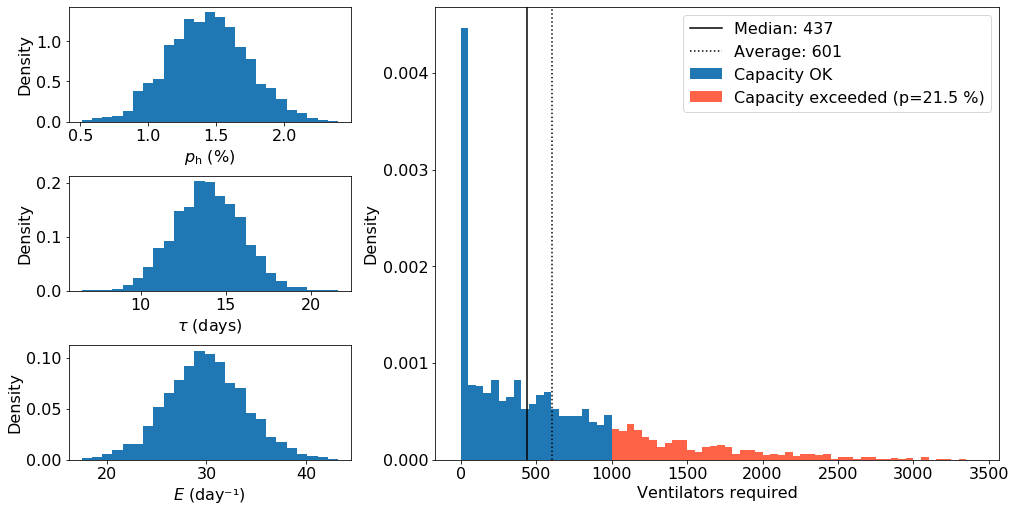

In [7]:
import numpy as np
from src import render

# Seed to get the same results with limited sampling
np.random.seed(0)

# Leave out mean value "mean" to use nominal as mean
par1 = dict(axlabel=r'$p_{\rm{h}}$ (%)',
            name='p_h',
            std=0.003,
            transform=run.frc_to_pct
            )

par2 = dict(axlabel=r'$\tau$ (days)',
            name='tau',
            std=2.,
            )

par3 = dict(axlabel='$E$ (day\u207B\u00B9)',
            name='Es',
            std=4.,
            extractfun=run.get_first,
            castfun=np.atleast_1d,
            )

pars = par1, par2, par3


response = dict(name='ventilators_required',
                transform=run.get_max,
                title="Ventilators required",
               )

encounters_per_day = 30
times, values = run.ua('covid19', 'denmark',
                       encounters_per_day, 
                       pars, response,
                       nsamples=2500,
                       tspan=[0, 300])

As we saw in a previous section (*flattened scenario*), ~490 ventilators are required when simulating using the nominal parameters ($p_{\rm{h}}$, $\tau$, $E$) = (1.3 %, 14 days, 30/day). However, as expected, many scenarios result in a higher number of required ventilators. The red bars in the histogram (right panel) illustrate scenarios where the ventilator capacity is exceeded. This occurs in 22 % of the sampled scenarios. Whether 22 % is a "high", "low" number is a political question, but if it is considered is too high the mean $E$ must be reduced below 30/day. The spike at zero ventilators required comes from parameter combination where $r_{\rm{I+}} / r_{\rm{I-}}$ drops below unity and therefore these scenarios are damped with no epidemic. Note that the assumption $p_{\rm{h}} \sim \mathcal{N}(\mu$=1.3 %, $\sigma$=0.3 %) results in ~50 % of the samples having $p_{\rm{h}}$ < 1.3 %. If experts advice that this is not realistic another distribution should be used.

The full time series corresponding to the sampling are shown below along with the median time series and selected percentile intervals for the time series. Note that the maximum of the average curve shown below (~390) is not the same as the average of the maxima for the individual curves shown above (601). This discrepancy is also pronounced for the meadian where the maximum of the median curve is ~230 (figure below) while the meadian of the maxima for the indidual curves is 437 (figure above). In my opinion the number from the figure above i.e. 437 is the most correct estimate of the required number of ventilators. The time series below have their maximum at different times and therefore the median and average curves may share little resemblance with any of the simulated scenarios. Consequently, such a representation is of little quantitative use.

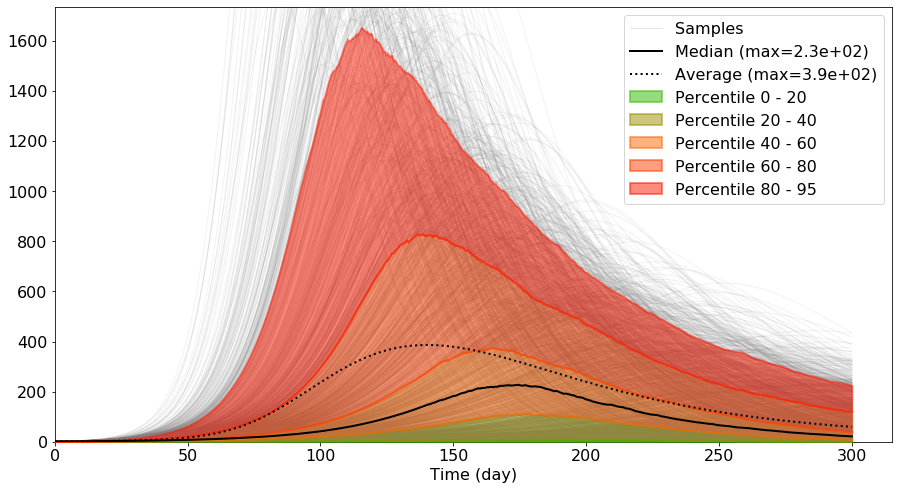

In [8]:
render.ua_timeseries(times, values.T)

### Uncertainty (closing-reopening scenario)
Here we will rerun the closing-reopening scenario but taking into account parameters uncertainties. To recap I vary $E$ in three steps representing a closing-reopening strategy. I will start using $E$ = 50 until day 40 where social distancing is enforced by reducing $E$ to 15. This strict distancing regime is maintained for 14 days after which, at day 54, society is somewhat opened up as represented by increasing $E$ to 30. The results are shown below. 

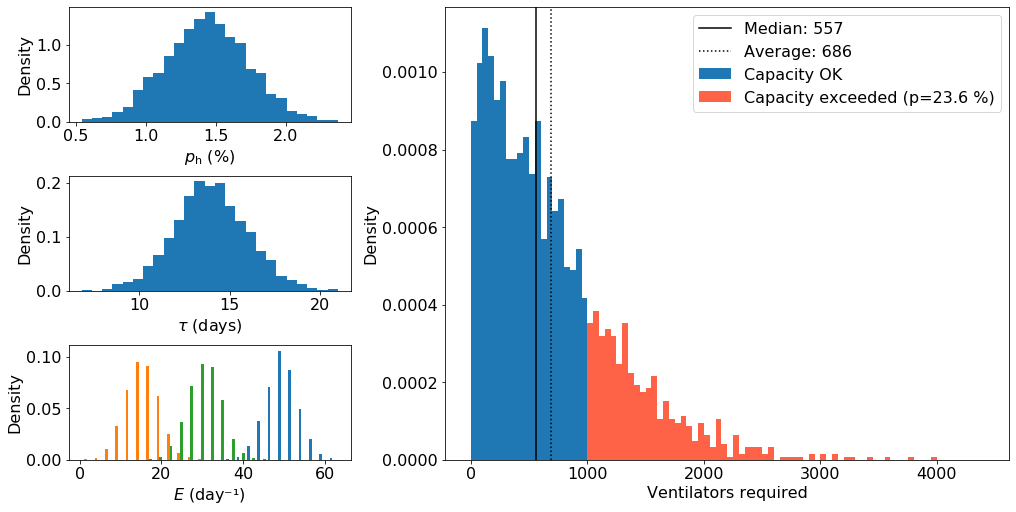

In [9]:
times, response_tseries = run.ua('covid19', 'denmark', [50, 15, 30], 
                                  pars, response,
                                  nsamples=2500, tspan=[0, 40, 54, 150])

The median for the maximum number of ventilators required is 516 which is below the number of ventilator (1000) and slightly above 480 which is the required number of ventilator found in the [nominal close-reopen scenario](#nominal_close_reopen). In 24 % of the simulated scenarios the ventilator capacity is exceeded.

To illustrate the simulated scenarios, but not for quantitative use, the figure below shows a percentile plot of the time series corresponding to the simulated scenarios.

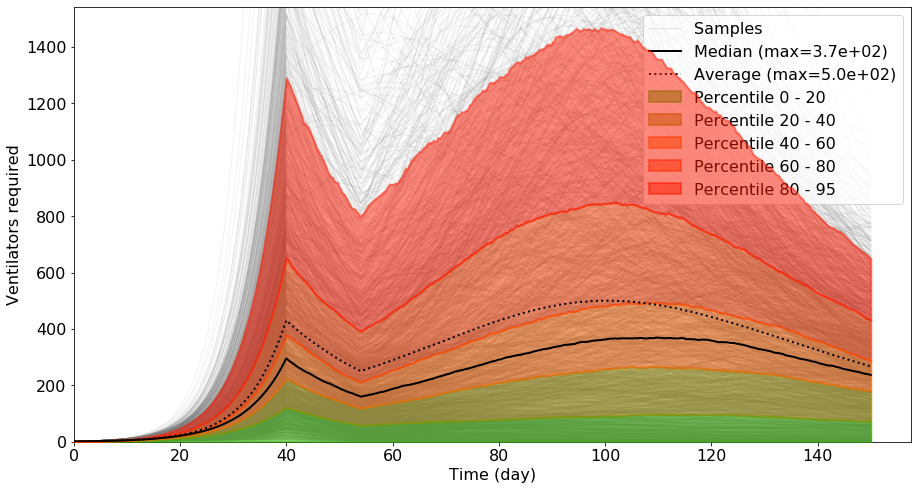

In [10]:
render.ua_timeseries(times, response_tseries.T, ylabel=response['title'])

Multistage infections
------
<a id='multistage_infections'></a>

Before we show results for virus simulations that incorporate multiple infection stages let us look more closely at the exponential and Erlang distributions. As an example let us  compare Exp($r$=0.133) with Erlang($r$=0.667, $k$=5). Both distributions have the same mean value (7.5), but the top panel in the figure below shows that the two probability distribution functions look quite different. The exponential has the highest density at $x$=0 while the density of the Erlang distribution is essentially zero here. The mode and mean of the Erlang distribution are closer than in the exponential case so finding values around the mean is more likely in the Erlang case. The solid and dashed black lines in the bottom panel shows the corresponding survival functions (1 - cumulative distribution function). Qualitatively, there is a delay in the Erlang survival function followed by a decay, which is steeper than that for the exponential. Both the two PDFs and the two CDFs are calculated from analytical expressions. 

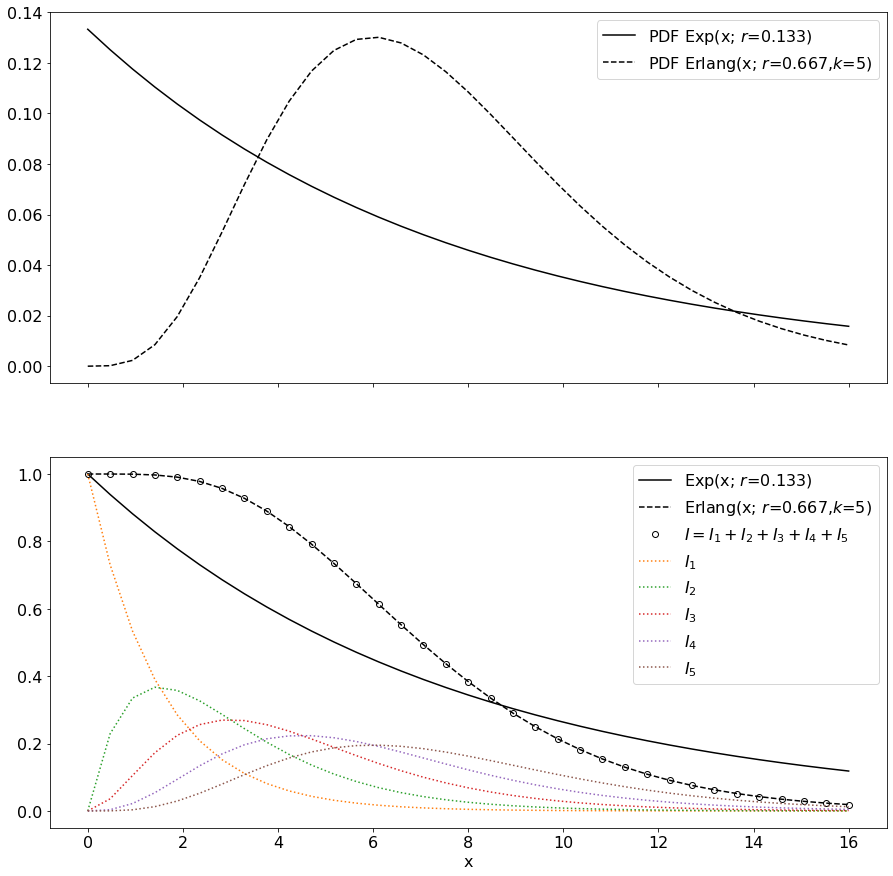

In [11]:
import src.multistage as multistage

k = 5
scale = 1.5
rate = 1./scale
# Adjust exp rate to same mean as Erlang
rate_exp = rate/k 

multistage.example(rate, rate_exp, k)

The bottom panel in the figure above also shows the survival function $I$ of Erlang($r$=0.667, $k$=5) in open circles  calculated by solving the five coupled ODEs for the five sequential exponential stages. The five contributions to the survival function $I$ coming from the five stages are shown in dotted colored lines. 

To simplify let us assume that the infection time $\tau$ is the mean residence time in the infected state i.e. $k/r$ instead of being given by the value of the survival function at $\tau$. First we refit $p_{\rm{t}}$ to get ~940 dead individuals during the outbreak and find $p_{\rm{t}}$ = 0.31224 %. From the figure we see that all results, except for the duration of the outbreak, are the same as we found in the [flu simulation above](#flu_simulation).

--------------------------------
Parameters
--------------------------------
Encounters               50 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0       500 
Infctn time (τ)           7 day
Infctn stages (k)         1 
Survival at τ        36.788 %
Mean infctn time      7.000 day
r_I+                  0.156 /day
r_I-                  0.143 /day
k·r_I+ / r_I-         1.093 
p_t                    0.31 %
p_h                    1.44 %
p_d                    0.10 %
p_v                    0.00 %
p_d,nv                 0.00 %
--------------------------------


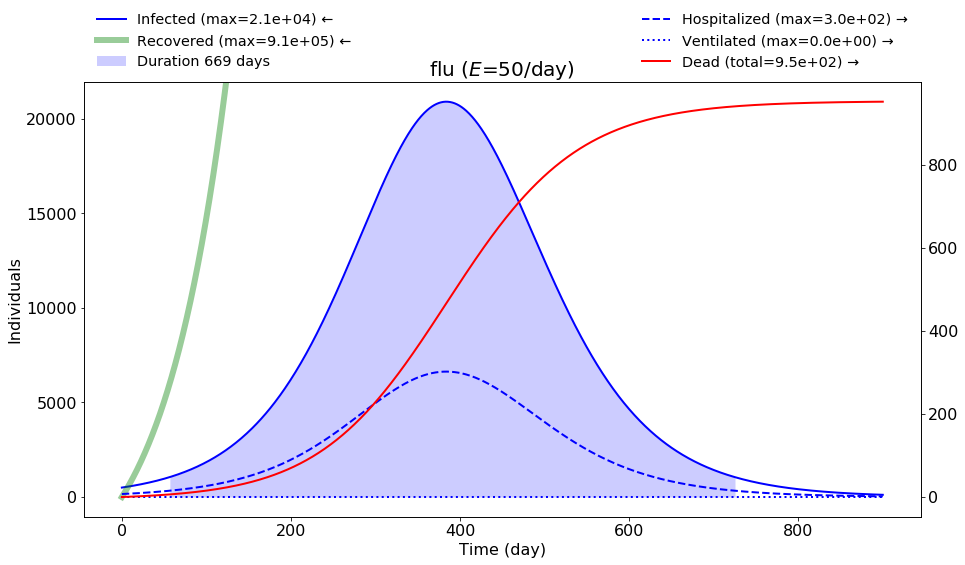

In [12]:
encounters_per_day = 50
p_t = 0.0031224
run.virus('flu', 'denmark',
          encounters_per_day, k=1,
          p_t=p_t, survival_at_tau='tau_is_mean',
          tspan=[0, 900])

Now we run a the flu simulation with the same parameters, but with $k$=5. From the figure below we see that the total number of recovered and dead individuals are the same as in the case with $k$=1. The duration of the outbreak is, however, shorter and the maximum number of infected as well as the maximum number of hospitalized individuals is ~1.7 times higher than in the case with $k$=1. One could say that the *intensity* of the outbreak has increased. Without intensity data such as the maximum number of hospitalized individuals it is difficult to choose between the two models.

--------------------------------
Parameters
--------------------------------
Encounters               50 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0       500 
Infctn time (τ)           7 day
Infctn stages (k)         5 
Survival at τ        44.049 %
Mean infctn time      7.000 day
r_I+                  0.156 /day
r_I-                  0.714 /day
k·r_I+ / r_I-         1.093 
p_t                    0.31 %
p_h                    1.44 %
p_d                    0.10 %
p_v                    0.00 %
p_d,nv                 0.00 %
--------------------------------


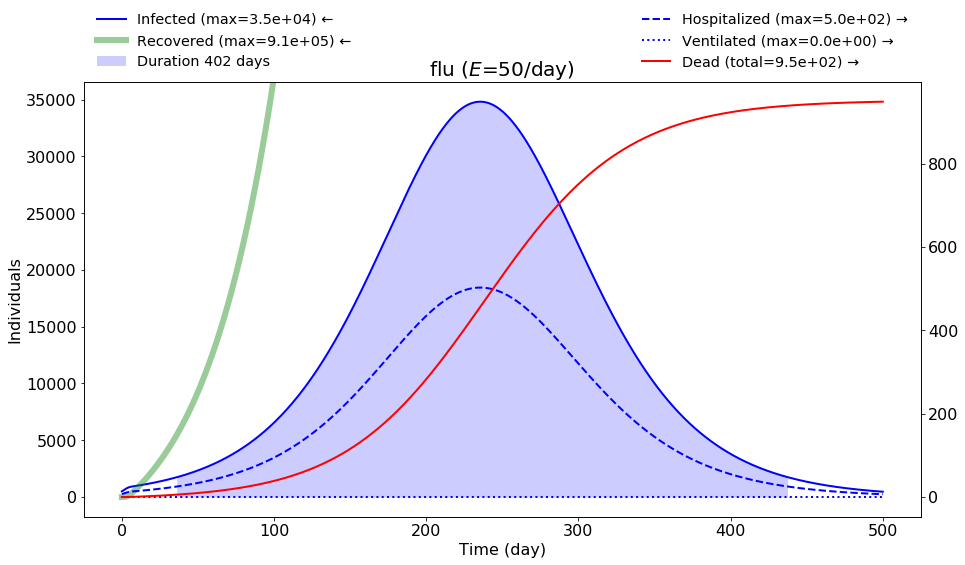

In [13]:
run.virus('flu', 'denmark',
          encounters_per_day, k=5, tspan=[0, 500],
          p_t=p_t, survival_at_tau='tau_is_mean')

Now let us turn back to the COVID-19 simulation. With $k$=1 we find $28\cdot 10^3$ deads (data not shown) as in the no intervention case. The results from a simulation with $k$=5 is shown below.

--------------------------------
Parameters
--------------------------------
Encounters               50 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0       500 
Infctn time (τ)          14 day
Infctn stages (k)         5 
Survival at τ        44.049 %
Mean infctn time     14.000 day
r_I+                  0.156 /day
r_I-                  0.357 /day
k·r_I+ / r_I-         2.186 
p_t                    0.31 %
p_h                    1.44 %
p_d                    0.50 %
p_v                   20.00 %
p_d,nv                90.00 %
--------------------------------


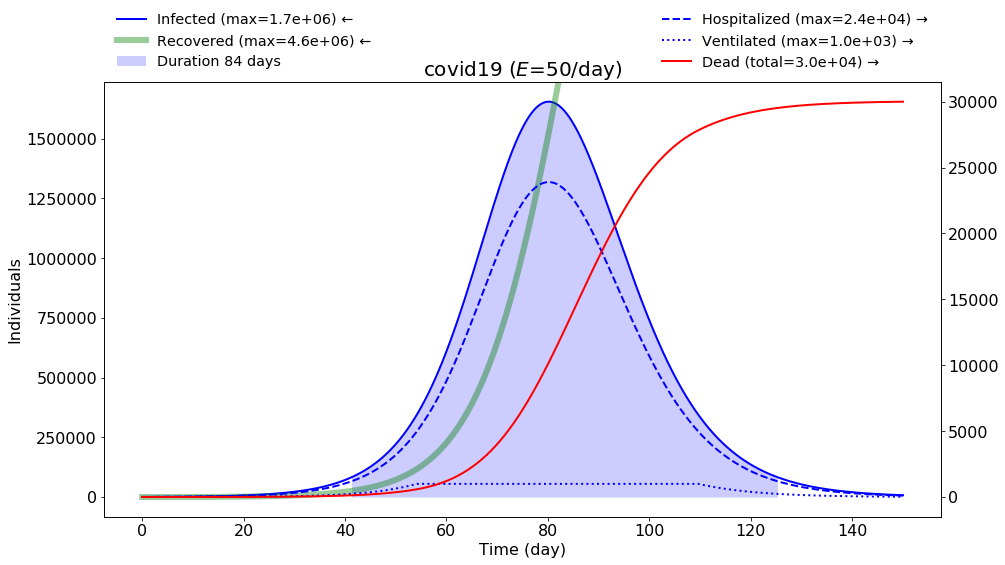

In [14]:
run.virus('covid19', 'denmark',
          encounters_per_day, k=5,
          p_t=p_t, survival_at_tau='tau_is_mean',
          tspan=[0, 150])

From the figure above we see that the total number of recovered is the same as in the no intervention case. The number of deads has, however, increased from $28\cdot 10^3$ to $30\cdot 10^3$. The reason is that the outbreak intensity is higher here and therefore the lack of ventilators is greater than before resulting in an increased number of infected individual subject to $p_{\rm{d, nv}}$ rather than $p_{\rm{d}}$. 

As $k$ increases the variance in the Erlang distributed infection times decreases and at very high values of $k$ all infections times are essentially equal to the mean and the survival function looks like a step function going from 1 to 0 when crossing the mean infection time from the left. The figure below shows an example for $k$=10000.

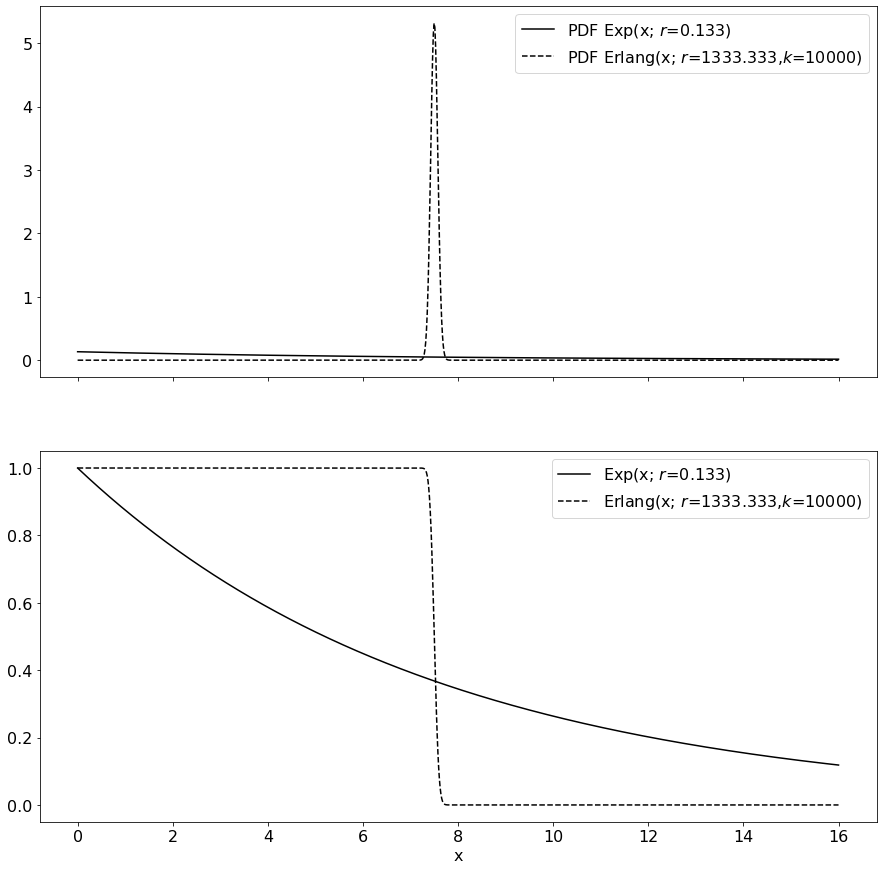

In [15]:
k = 10000
mean = 7.5
rate = k/mean
# Adjust exp rate to same mean as Erlang
rate_exp = rate/k 
multistage.exp_erl(rate, rate_exp, k, neval=1000)

As an experiment we let us increase $k$ to 50 for COVID-19. The results are shown in the figure below and show that increasing $k$ from 5 to 50 gives a death count of $31\cdot 10^3$. Increasing $k$ to e.g. 500 or 2000 gives a death count of $31\cdot 10^3$ in both cases (data not shown) so there is an upper limit to the effect of $k$.

--------------------------------
Parameters
--------------------------------
Encounters               50 /day
Population          5500000 
Vent. capacity         1000 
Infected at day 0       500 
Infctn time (τ)          14 day
Infctn stages (k)        50 
Survival at τ        48.119 %
Mean infctn time     14.000 day
r_I+                  0.156 /day
r_I-                  3.571 /day
k·r_I+ / r_I-         2.186 
p_t                    0.31 %
p_h                    1.44 %
p_d                    0.50 %
p_v                   20.00 %
p_d,nv                90.00 %
--------------------------------


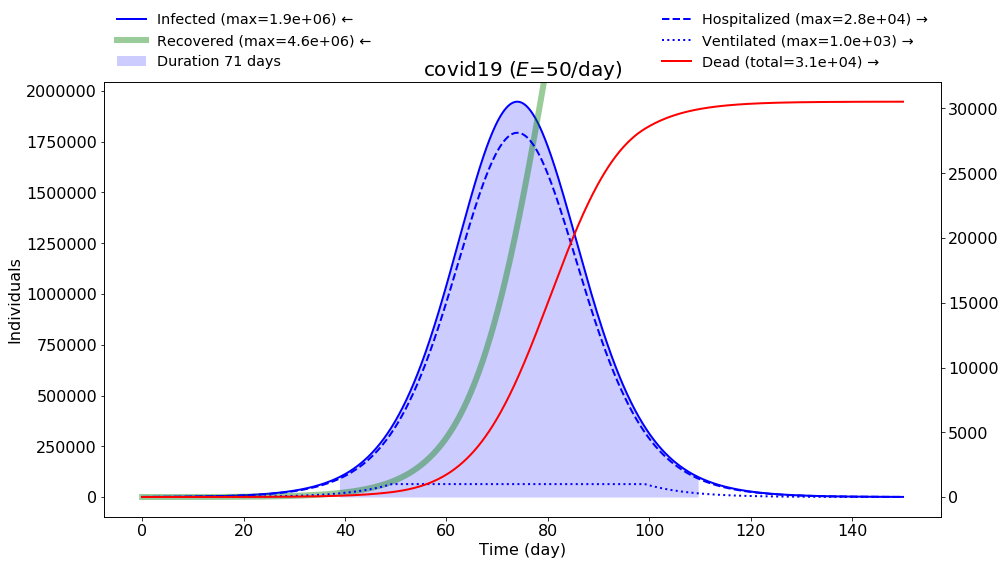

In [16]:
run.virus('covid19', 'denmark',
          encounters_per_day, k=50,
          p_t=p_t, survival_at_tau='tau_is_mean', tspan=[0,150])

Outlook
=======
For me this has been an instructive modeling exercise and I hope you have enjoyed it. As time goes by we will learn more about COVID-19 and the model parameters. By then I might have time to update this notebook, but in case I don't I find it quite illustrative as is. 

With more time and better parameters it would relatively straight forward to introduce sub-populations such as vulnerable, kids and average adults. These sub-populations could be assigned different behavioral patterns ($E$, $p_{\rm{t}}$) and different health parameters ($p_{\rm{d}}$, $p_{\rm{i}}$, $p_{\rm{v}}$) to each such population. Such a model could simulate more advanced scenarios where different parts of the population were subject to different mitigation strategies.

APPENDIX: 
===============

Contagious contacts
----------
Let $N_\rm{c}$ denote the number of contacts and $p_{\rm{cc}}$ the probability of one contact being contagious. Then, the number of contagious contacts $N_{\rm{cc}} \sim \rm{B}(N_{\rm{c}}, p_{\rm{cc}})$ where $\rm{B}$ denotes the binomial distribution. When the total population count is $N$ and each individual comes into contact with $E$ individuals, the expected value for the number of contagious contacts is 

$$ \langle N_{\rm{cc}} \rangle = \langle \mathrm{B} (N_{\rm{c}}, p_{\rm{cc}}) \rangle = \frac{NE}{2} p_{\rm{cc}}.$$

The factor of 1/2 corrects for double counting i.e. person A meeting B is the same as person B meeting A and should not be included twice.

A contagious contact occurs when three events occur namely the encounter happens between an individual in the infected state $\rm{I}$ and an individual in the healthy state $\rm{H}$ and circumstances support transfer $\rm{T}$. This may be written as the intersection of the three events i.e. $\rm{I} \cap \rm{H} \cap \rm{T}$. Actually, the intersection of healthy meeting infected and the infection is transferred  i.e. $\rm{H} \cap \rm{I} \cap \rm{T}$ is also contagious so the probability of a contact being contagious can be written

$$
\begin{align}
p_{\rm{cc}} &= p \big((\mathrm{I} \cap \mathrm{H} \cap \mathrm{T}) \cup (\mathrm{H} \cap \mathrm{I} \cap \mathrm{T}) \big) \\ 
&= p(\mathrm{I} \cap \mathrm{H} \cap \mathrm{T}) + p(\mathrm{H} \cap \mathrm{I} \cap \rm{T}).
\end{align}
$$

Using the chain rule

$$p_{\rm{cc}} = p(\mathrm{I}) p(\mathrm{H} \: | \: \mathrm{I}) p(\mathrm{T} \: | \: \mathrm{I} \cap \mathrm{H}) + p(\mathrm{H}) p(\mathrm{I} \: | \: \mathrm{H}) p(\mathrm{T} \: | \: \mathrm{H} \cap \mathrm{I}).$$

When all three events are independent the order does not matter and we get

$$p_{\mathrm{cc}} = 2p(\mathrm{I})p(\mathrm{H})p(\mathrm{T}).$$

Introducing the infected population fraction $I$, the healthy population fraction $H$ and defining $p(\mathrm{T}) = p_{\mathrm{t}}$ we may write the expected value for the number of contagious contacts as

$$ \langle N_{\mathrm{cc}} \rangle = N E I H p_{\mathrm{t}}. $$

Or in terms of the increase in $I$ denoted $\delta I_{\mathrm{+}}$

$$ \langle \delta I_{\rm{+}} \rangle = E I H p_{\mathrm{t}} \sim r_{\rm{I+}} I H$$

Some viruses have symptoms such as coughing and sneezing which would probably render $p(\mathrm{T} \: | \: \mathrm{H} \cap \mathrm{I}) \neq p(\mathrm{T})$. On the other hand some symptoms are quite severe and could reduce $E$ for infected individuals since the individuals experiencing such symptoms would stay at home. From the section on [multistage models](#multistage_model) we can see that it is quite easy to introduce different values for $r_{\rm{I+}}$ for the different infection stages.